In [21]:
import requests as req
from datetime import datetime
import csv

In [2]:


url ='https://api.covid19api.com/dayone/country/brazil'

reqCov= req.get(url)
print(reqCov.status_code) #verifica se deu certo
dadosCovid=reqCov.json() #guardei num dicionário

200


In [3]:
print(dadosCovid)

[{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903', 'Country': 'Brazil', 'CountryCode': 'BR', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '-14.24', 'Lon': '-51.93', 'Confirmed': 1, 'Deaths': 0, 'Recovered': 0, 'Active': 1, 'Date': '2020-02-26T00:00:00Z'}, {'ID': '3489e1fd-c6b7-4cd1-b385-55c1eac25928', 'Country': 'Brazil', 'CountryCode': 'BR', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '-14.24', 'Lon': '-51.93', 'Confirmed': 1, 'Deaths': 0, 'Recovered': 0, 'Active': 1, 'Date': '2020-02-27T00:00:00Z'}, {'ID': 'f75ec5b9-1d0e-4bc0-9c9f-1046234d2a71', 'Country': 'Brazil', 'CountryCode': 'BR', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '-14.24', 'Lon': '-51.93', 'Confirmed': 1, 'Deaths': 0, 'Recovered': 0, 'Active': 1, 'Date': '2020-02-28T00:00:00Z'}, {'ID': 'caf0fef2-67a2-44d0-8ca7-e4fba1113fbd', 'Country': 'Brazil', 'CountryCode': 'BR', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '-14.24', 'Lon': '-51.93', 'Confirmed': 2, 'Deaths': 0, 'Recovered': 0, 'Active': 2, 

In [39]:
final_data=[]

for dado in dadosCovid:
    datacerta=datetime.strptime(dado['Date'][:10], "%Y-%m-%d")
    final_data.append([dado['Confirmed'],dado['Deaths'],dado['Recovered'],dado['Active'],datacerta])

CONFIRMADOS=0
OBITOS=1
RECUPERADOS=2
ATIVO=3
DATA=4

#for i in range(1,len(final_data)):
print(final_data)

[[1, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)], [1, 0, 0, 1, datetime.datetime(2020, 2, 27, 0, 0)], [1, 0, 0, 1, datetime.datetime(2020, 2, 28, 0, 0)], [2, 0, 0, 2, datetime.datetime(2020, 2, 29, 0, 0)], [2, 0, 0, 2, datetime.datetime(2020, 3, 1, 0, 0)], [2, 0, 0, 2, datetime.datetime(2020, 3, 2, 0, 0)], [2, 0, 0, 2, datetime.datetime(2020, 3, 3, 0, 0)], [4, 0, 0, 4, datetime.datetime(2020, 3, 4, 0, 0)], [4, 0, 0, 4, datetime.datetime(2020, 3, 5, 0, 0)], [13, 0, 0, 13, datetime.datetime(2020, 3, 6, 0, 0)], [13, 0, 0, 13, datetime.datetime(2020, 3, 7, 0, 0)], [20, 0, 0, 20, datetime.datetime(2020, 3, 8, 0, 0)], [25, 0, 0, 25, datetime.datetime(2020, 3, 9, 0, 0)], [31, 0, 0, 31, datetime.datetime(2020, 3, 10, 0, 0)], [38, 0, 0, 38, datetime.datetime(2020, 3, 11, 0, 0)], [52, 0, 0, 52, datetime.datetime(2020, 3, 12, 0, 0)], [151, 0, 0, 151, datetime.datetime(2020, 3, 13, 0, 0)], [151, 0, 0, 151, datetime.datetime(2020, 3, 14, 0, 0)], [162, 0, 0, 162, datetime.datetime(2020, 3, 15, 0,

In [30]:
with open('brasil_covid.csv','w') as file:
    writer = csv.writer(file)
    writer.writerows(final_data)
    
def get_datasets(y, labels):
    if type(y[0] == list):
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data': y[i]
            })
        return datasets
    else:
        return [
            {
                'label': labels[0],
                'data': y
            }
        ]

In [31]:
def set_title(title=''):
    if title != "":
        display = 'true'
    else:
        display = "false"
    return {
        'title': title,
        'display': display
    }

In [32]:
def create_chart(x, y, labels, kind='bar', title=''):
    
    datasets = get_datasets(y, labels)
    options = set_title(title)
    
    chart = {
        'type': kind,
        'data': {
            'labels': x,
            'datasets': datasets
        },
        'options': options
    }
    
    return chart

In [33]:
def get_api_chart(chart):
    url_base = 'https://quickchart.io/chart'
    resp = req.get(f"{url_base}?c={str(chart)}")
    return resp.content

In [34]:
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

In [35]:
!pip install pillow

Defaulting to user installation because normal site-packages is not writeable


In [36]:
from PIL import Image
from IPython.display import display

In [37]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

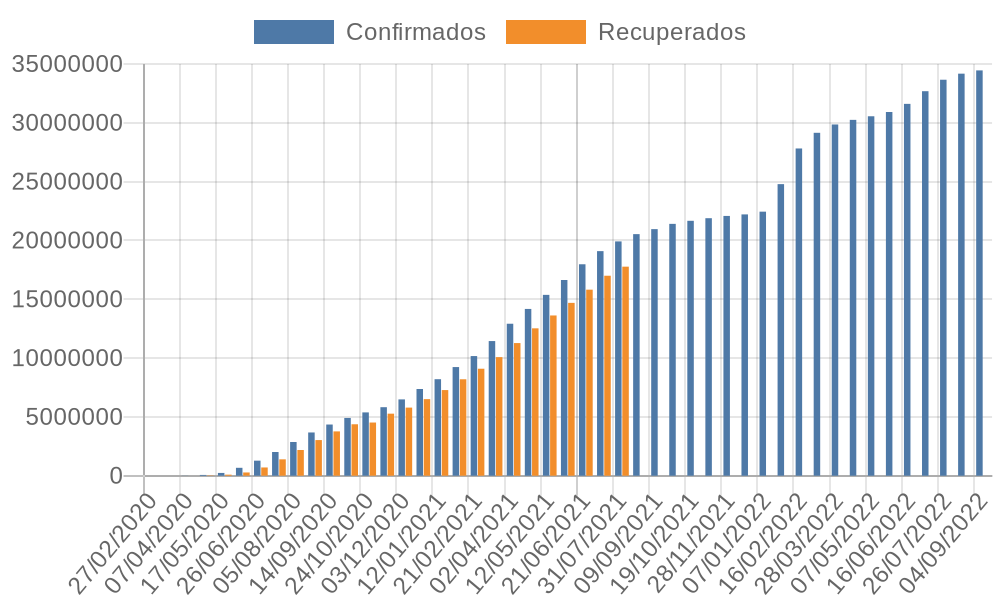

In [49]:
y_data_1 = []
for i in final_data[1::20]:                   # mudei o valor do passo para 20, pra gerar qrcode
    y_data_1.append(i[CONFIRMADOS])
    
y_data_2 = []
for i in final_data[1::20]:                   # mudei o valor do passo para 20, pra gerar qrcode
    y_data_2.append(i[RECUPERADOS])
    
labels = ['Confirmados', 'Recuperados']

x = []
for i in final_data[1::20]:
    x.append(i[DATA].strftime('%d/%m/%Y'))
    
    
chart = create_chart(x, [y_data_1, y_data_2], labels, title='Confirmados vs Recuperados')
chart_content = get_api_chart(chart)
save_image('grafico-covid.png', chart_content)
display_image('grafico-covid.png')

In [41]:
from urllib.parse import quote

In [44]:
def get_api_qrcode(link):
    text = quote(link) # parsing link to url
    url_base = 'https://quickchart.io/qr'
    resp = req.get(f"{url_base}?text={text}")
    return resp.content

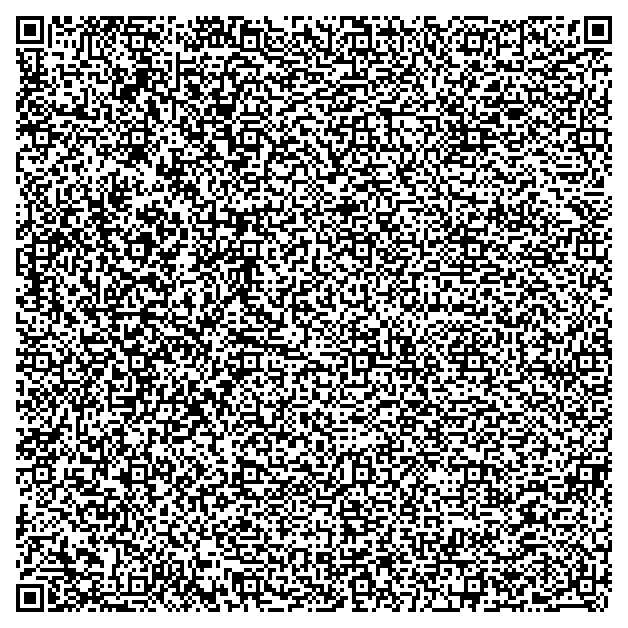

In [54]:
url_base = 'https://quickchart.io/chart'
link = f"{url_base}?c={str(chart)}"
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')

In [55]:
print(link)

https://quickchart.io/chart?c={'type': 'bar', 'data': {'labels': ['27/02/2020', '18/03/2020', '07/04/2020', '27/04/2020', '17/05/2020', '06/06/2020', '26/06/2020', '16/07/2020', '05/08/2020', '25/08/2020', '14/09/2020', '04/10/2020', '24/10/2020', '13/11/2020', '03/12/2020', '23/12/2020', '12/01/2021', '01/02/2021', '21/02/2021', '13/03/2021', '02/04/2021', '22/04/2021', '12/05/2021', '01/06/2021', '21/06/2021', '11/07/2021', '31/07/2021', '20/08/2021', '09/09/2021', '29/09/2021', '19/10/2021', '08/11/2021', '28/11/2021', '18/12/2021', '07/01/2022', '27/01/2022', '16/02/2022', '08/03/2022', '28/03/2022', '17/04/2022', '07/05/2022', '27/05/2022', '16/06/2022', '06/07/2022', '26/07/2022', '15/08/2022', '04/09/2022'], 'datasets': [{'label': 'Confirmados', 'data': [1, 372, 14034, 67446, 241080, 676893, 1281636, 2017616, 2868616, 3678279, 4353602, 4917689, 5384342, 5825111, 6492564, 7372614, 8205289, 9237011, 10173817, 11447416, 12920540, 14182258, 15373850, 16636801, 17979164, 19093845, 19